In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from scipy.optimize import fmin
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
#to en otra carpeta
sns.set_theme()

# Se analiza una situación donde pretende medir la pendiente de una linea recta:

$$y=ax+b$$

Asuma que se tienen valores reales para a=1 y b=1

Text(0, 0.5, '$Y$')

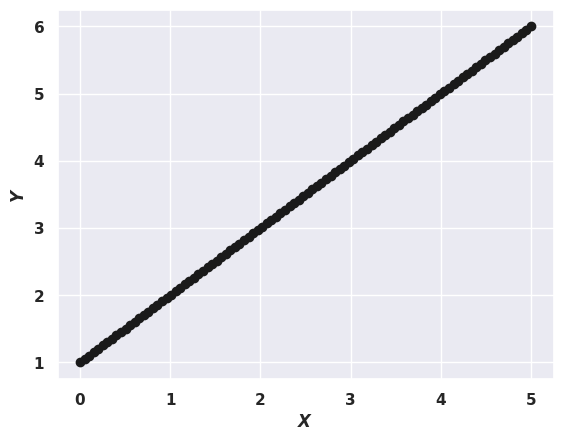

In [2]:
x_real=np.linspace(0,5,100)
a_real=1
b_real=1
y_real=a_real*x_real+b_real
plt.plot(x_real,y_real,'ko')
plt.xlabel('$X$')
plt.ylabel('$Y$')

# Funciones utilizadas a lo largo del notebook


In [3]:
def central(s,k):
    new_s=[]
    for i in range(0,len(s)):
        new_s.append(np.mean(np.random.choice(s,size=k)))
    return new_s

def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio



    

# Caso 1:

Hallar 'a' mediante,

$$a=\frac{y-b}{x}$$

por tanto, se tiene que:

$$a_{est}=\frac{\mu_y-\mu_b}{\mu_x}$$

y

$$\sigma_{est}^{2}=\frac{\sigma^{2}_y}{\mu_x}+\frac{\sigma^{2}_b}{\mu_x}+\frac{\sigma^{2}_x}{\mu_x^{2}}$$

# Analisis de variación de un solo parametro.

In [3]:
def pendiente(err,mu,variar,N):
    
    aas=[]
    global mux; global muy; global mub; global errx; global erry; global errb 
    
    mux=x_real[5]
    muy=y_real[5]
    mub=b_real
    
    errx=0
    erry=0
    errb=0

    globals()[variar[0]]=mu
    globals()[variar[1]]=err

  
    for j in range(N):
        
        x=np.random.normal(mux,errx,1)[0]
        b=np.random.normal(mub,errb,1)[0]
        y=np.random.normal(muy,erry,1)[0]
        aas.append((y-b)/x)
        
    return aas



In [4]:
f=plt.figure(figsize=(15,5))

variar=[['mux','errx'],['muy','erry'],['mub','errb']]
er_r=np.linspace(0.001,0.4,100) #  Porcentaje de error
mu_x=np.linspace(x_real[5]-x_real[5]*0.3,x_real[5]+x_real[5]*0.3,100)
mu_y=np.linspace(y_real[5]-y_real[5]*0.3,y_real[5]+y_real[5]*0.3,100)
mu_b=np.linspace(b_real-b_real*0.3,b_real+b_real*0.3,100)
names=['mu_x','mu_y','mu_b']
N=500
resultados=[]

for  cont, l in enumerate(variar):
    
    mu1=np.zeros((len(er_r),len(er_r)))

    for k in range(len(er_r)):

        for j in range(len(mu_x)):

            z=pendiente(er_r[j],eval(names[cont])[k],l,N)
        
            desv=np.std(z,ddof=1)

            standard=desv
            
            if abs(np.mean(z)-a_real)<standard:

                mu1[k,j]=1
            
            else:
                mu1[k,j]=0
                
    resultados.append(mu1)

<Figure size 1500x500 with 0 Axes>

In [6]:
mu=np.linspace(0.6,1.4,100)
mu2=np.zeros((len(er_r),len(er_r)))

for k in range(len(er_r)):

    for j in range(len(mu_x)):

        z=np.random.normal(mu[k],er_r[j],N)
    
        desv=np.std(z,ddof=1)

        standard=desv
        
        if abs(np.mean(z)-a_real)<standard:

            mu2[k,j]=1
        
        else:
            mu2[k,j]=0
            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.axis.YTick at 0x7fd7991255a0>,
 [Text(0, 0, '0.6'),
  Text(0, 14, '0.71'),
  Text(0, 28, '0.83'),
  Text(0, 42, '0.94'),
  Text(0, 56, '1.05'),
  Text(0, 70, '1.17'),
  Text(0, 84, '1.28'),
  Text(0, 98, '1.39')])

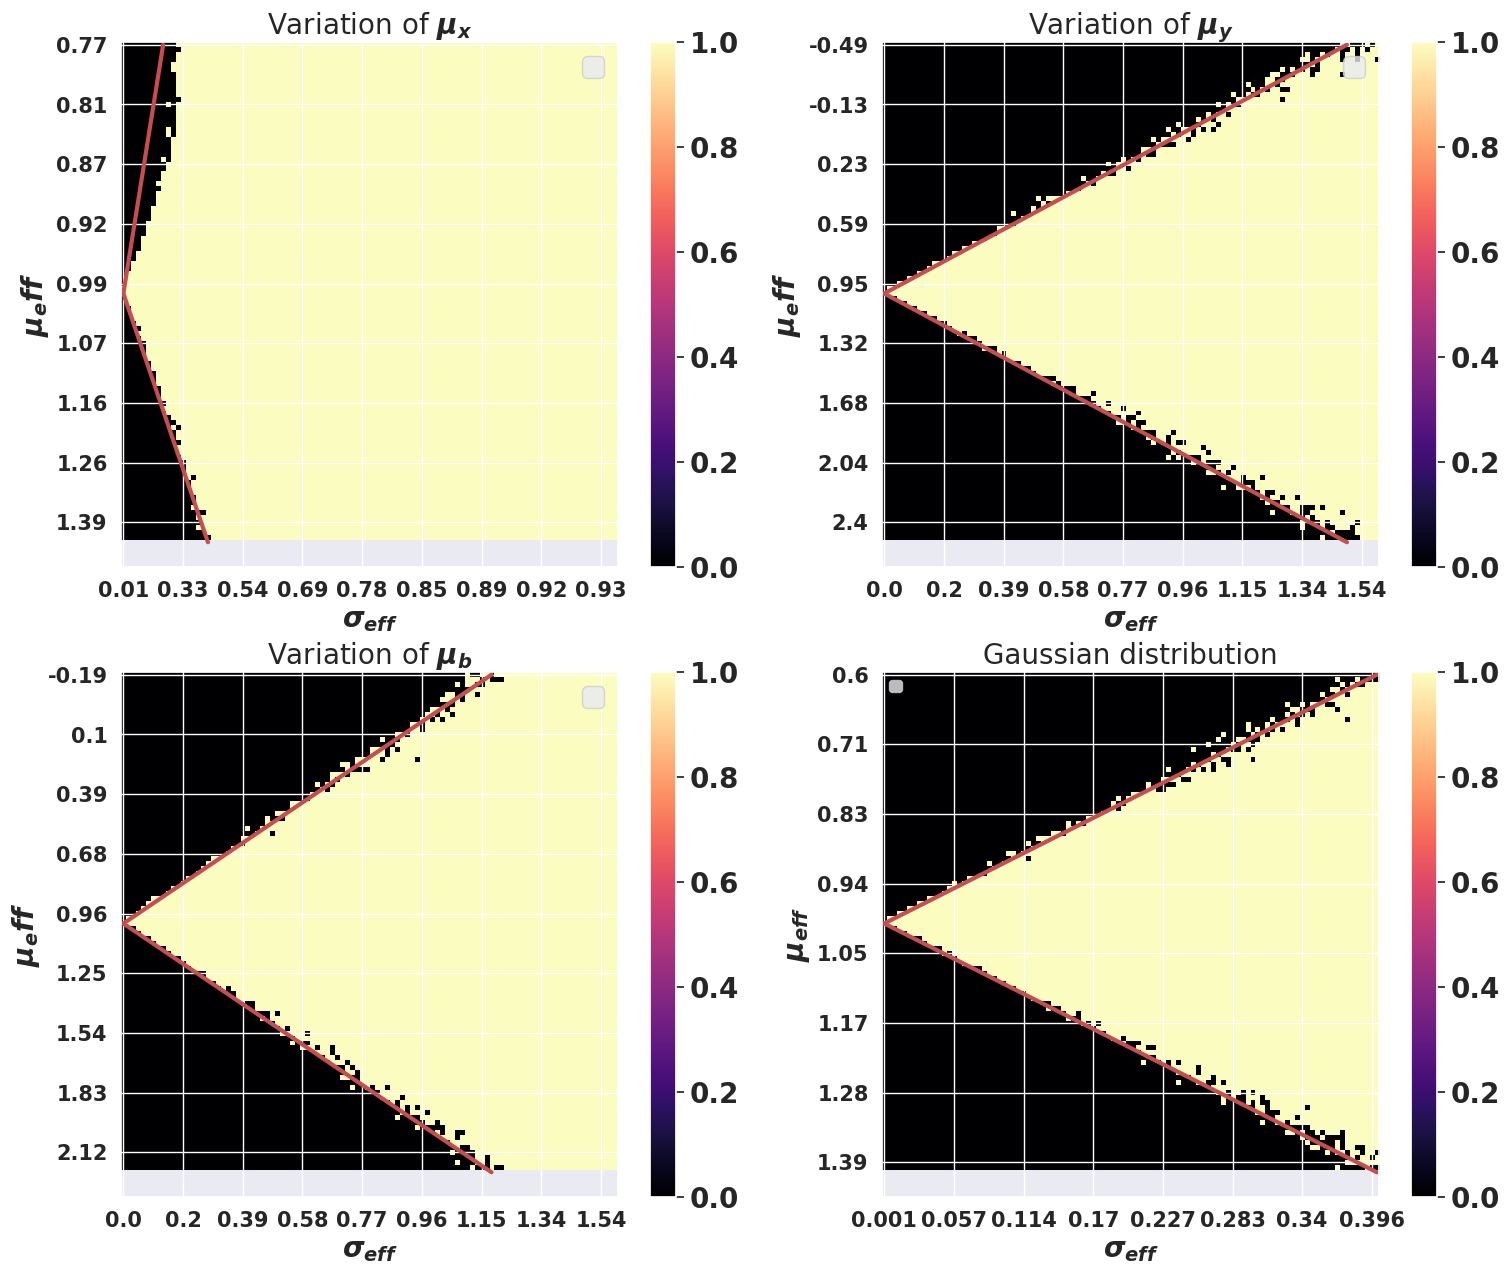

In [9]:
f=plt.figure(figsize=(18,15))
v_real=['X','Y','B']
new_et1=[np.sort((y_real[5]-b_real)/mu_x),np.sort((mu_y-b_real)/x_real[5]),np.sort((y_real[5]-mu_b)/x_real[5])]
sigmaeff=[(er_r**2/mu_x**4*(y_real[5]-b_real)**2)**0.5,(er_r**2/x_real[5]**2)**0.5,(er_r**2/x_real[5]**2)**0.5]
titles=['Variation of $\mu_x$','Variation of $\mu_y$','Variation of $\mu_b$']
labelss=[r'$\frac{\mu^{real}_y-\mu^{real}_b}{\mu_x}$',r'$\frac{\mu_y-\mu^{real}_b}{\mu^{real}_x}$',r'$\frac{\mu^{real}_y-\mu_b}{\mu^{real}_x}$']
for i,j in enumerate(names):

    plt.subplot(2,2,i+1)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    plt.imshow(resultados[i],cmap='magma')
    
    index_max=[abs(sigmaeff[i][k]+a_real-max(new_et1[i])) for k in range(len(sigmaeff[i]))]
    index_min=[abs(-sigmaeff[i][k]+a_real-min(new_et1[i])) for k in range(len(sigmaeff[i]))]


    plt.plot([0,index_max.index(min(index_max))],[int(len(er_r)/2),int(len(er_r))],'r',[0,index_min.index(min(index_min))],[int(len(er_r)/2),0],'r',lw=3) # Arriba
    #plt.plot([0,index_min.index(min(index_min))],[int(len(er_r)/2),0],'r',lw=3) # Abajo
    #plt.plot([int(len(er_r)/2),60],[0,30])
    plt.ylabel('$\mu_eff$',fontsize=20)
    plt.xlabel('$\sigma_{eff}$' ,fontsize=20)
    plt.legend(fontsize=20)
    plt.colorbar()
    plt.title(titles[i],fontsize=20)

    errores=sigmaeff[i]
    nx = errores.shape[0]
    no_labels = 9 # how many labels to see on axis x
    step_x = int(nx / (no_labels - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position
    x_labels = np.round(errores[::step_x],2) # labels you want to see
    plt.xticks(x_positions, np.sort(x_labels),fontsize=15)

    new_et=new_et1[i]
    ny = new_et.shape[0]
    no_labels = 9 # how many labels to see on axis x
    step_y = int(ny / (no_labels - 1)) # step between consecutive labels
    y_positions = np.arange(0,ny,step_y) # pixel count at label position
    y_labels = np.round(new_et[::step_y],2) # labels you want to see
    plt.yticks(y_positions, (y_labels),fontsize=15)

    


plt.subplot(224)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.imshow(mu2,cmap='magma')
#plt.axhline(y=30, label='Real value',lw=5, c="r")
index_max=[abs(er_r[k]+a_real-max(mu)) for k in range(len(er_r))]
index_min=[abs(-er_r[k]+a_real-min(mu)) for k in range(len(er_r))]
plt.plot([0,index_max.index(min(index_max))],[int(len(er_r)/2),int(len(er_r))],'r',[0,index_min.index(min(index_min))],[int(len(er_r)/2),0],'r',lw=3) # Arriba
plt.ylabel('$\mu_{eff}$' ,fontsize=20)
plt.xlabel('$\sigma_{eff}$',fontsize=20)
plt.legend()
plt.colorbar()
plt.title('Gaussian distribution',fontsize=20)


nx = er_r.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = np.round(er_r[::step_x],3) # labels you want to see
plt.xticks(x_positions, np.sort(x_labels),fontsize=15)


new_et=mu
ny = new_et.shape[0]
no_labels = 8 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = np.round(new_et[::step_y],2) # labels you want to see
plt.yticks(y_positions, (y_labels),fontsize=15)




# Teoricamente.

([], [])

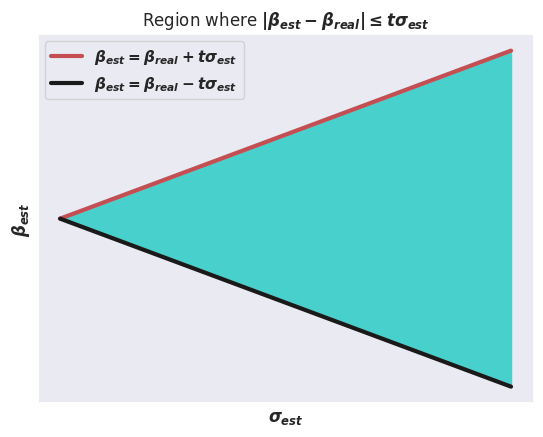

In [38]:
sigma_eff=np.linspace(0,10,100)
mu_eff=np.linspace(x_real[5],10,100)
y1=x_real[5]+sigma_eff
y2=x_real[5]-sigma_eff
plt.plot(sigma_eff,y1,'r',linewidth=3,label=r'$\beta_{est}=\beta_{real}+t\sigma_{est}$')
plt.plot(sigma_eff,y2,'k',linewidth=3,label=r'$\beta_{est}=\beta_{real}-t\sigma_{est}$')
plt.ylabel(r'$\beta_{est}$')
plt.xlabel(r'$\sigma_{est}$')
plt.legend()

plt.fill_between(sigma_eff, y2, y1,color='mediumturquoise')
plt.title(r'Region where $\left | \beta_{est}-\beta_{real} \right |\leq t \sigma_{est}$')
plt.yticks([])
plt.xticks([])

#plt.xticks([],' ')

In [35]:
plt.yticks??

Signature: plt.yticks(ticks=None, labels=None, *, minor=False, **kwargs)
Source:   
def yticks(ticks=None, labels=None, *, minor=False, **kwargs):
    """
    Get or set the current tick locations and labels of the y-axis.

    Pass no arguments to return the current values without modifying them.

    Parameters
    ----------
    ticks : array-like, optional
        The list of ytick locations.  Passing an empty list removes all yticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    minor : bool, default: False
        If ``False``, get/set the major ticks/labels; if ``True``, the minor
        ticks/labels.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.

    Returns
    -------
    locs
        The list of ytick locations.
    labels
        The list of ylabel `.Text` objects.

    Notes
    -----
    Calling this fu

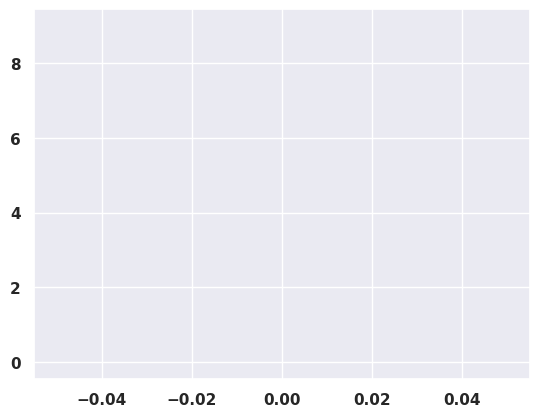

# Por minimos cuadrados.

$$a=\frac{\sum_i (y_i-b_i)x_i}{\sum_i x^2_i}$$

In [12]:
def a_value(x,y,b):
    return sum((y[i]-b[i])*x[i] for i in range(len(x)))/sum(x[i]**2 for i in range(len(x)))

In [14]:
a_value(x_real,y_real,np.ones(len(x_real))*b_real)

1.0

# Variando todos los parametros.

In [37]:
def pendiente2(err,mu1,mu2,mu3,N):
    
    aas=[]
    
    
    mux=mu1
    muy=mu2
    mub=mu3
    
    errx=err*x_real[5]
    erry=err*y_real[5]
    errb=err*b_real

 
  
    for j in range(N):
        
        x=np.random.normal(mux,errx,1)[0]
        b=np.random.normal(mub,errb,1)[0]
        y=np.random.normal(muy,erry,1)[0]
        aas.append((y-b)/x)
        
    return aas


In [39]:
f=plt.figure(figsize=(15,5))

variar=[['mux','errx'],['muy','erry'],['mub','errb']]
er_r=np.linspace(0.001,0.4,60) #  Porcentaje de error
mu_x=np.linspace(x_real[5]-x_real[5]*0.3,x_real[5]+x_real[5]*0.3,60)
mu_y=np.linspace(y_real[5]-y_real[5]*0.3,y_real[5]+y_real[5]*0.3,60)
mu_b=np.linspace(b_real-b_real*0.3,b_real+b_real*0.3,60)
names=['mu_x','mu_y','mu_b']
N=500
n=50
mu1=np.zeros((len(er_r),len(er_r)))



for k in range(len(er_r)):

    for j in range(len(mu_x)):

        z=pendiente2(er_r[j],mu_x[k],mu_y[k],mu_b[k],N)
    
        desv=np.std(z,ddof=1)

        standard=desv/np.sqrt(n)
        
        if abs(np.mean(z)-a_real)<standard:

            mu1[k,j]=1
        
        else:
            mu1[k,j]=0
            


<Figure size 1500x500 with 0 Axes>

([<matplotlib.axis.YTick at 0x7fd346c16c50>,
 [Text(0, 0, '-0.3'), Text(0, 20, '-0.097'), Text(0, 40, '0.107')])

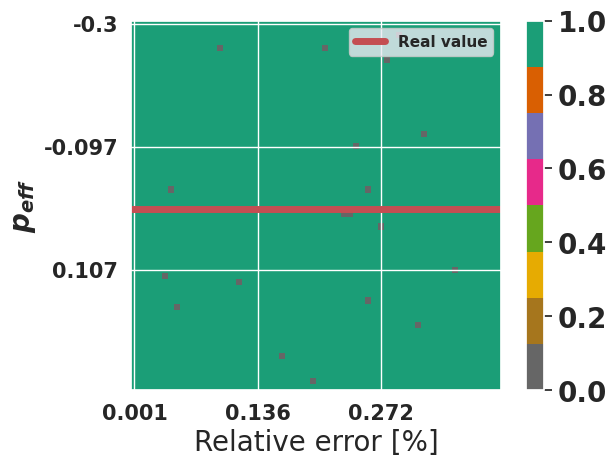

In [41]:
plt.subplot(111)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.imshow(mu1,cmap='Dark2_r')
plt.axhline(y=30, label='Real value',lw=5, c="r")
plt.ylabel('$p_{eff}$' ,fontsize=20)
plt.xlabel('Relative error [%]',fontsize=20)
plt.legend()
plt.colorbar()


new_et=np.linspace(-0.3,0.3,60)
nx = er_r.shape[0]
no_labels = 4 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = np.round(er_r[::step_x],3) # labels you want to see
plt.xticks(x_positions, np.sort(x_labels),fontsize=15)


ny = new_et.shape[0]
no_labels = 4 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = np.round(new_et[::step_y],3) # labels you want to see
plt.yticks(y_positions, np.sort(y_labels),fontsize=15)

# Analisis cuando 'a' es obtenido de un ajuste.

In [85]:
x_real=np.linspace(0,5,100)
a_real=1
b_real=1

def ruido(señal,desv): 
    '''
    Función para añadir ruido Gaussiano dada una desviación estandar

    Parametros
    ----------
    señal: Arreglo
      Arreglo con la señal a la que se le va añadir el ruido
    desv: float
      Desviación estandar
    '''
   
    señal_ruido=np.zeros(len(señal))
    señal_ruido=[ np.random.normal(señal[i], señal[i]*desv) for i in range(0,len(señal))]
    
    return np.array(señal_ruido)

def funcion(x,a):

    return a*x+b_real

Y_orig=funcion(x_real,a_real) # Señal real

def ajuste(err,mu,variar,N,metric):
    
    aas=[]

    global mux; global muy; global mub; global errx; global erry; global errb 

    mub=b_real
    
    errx=0
    erry=0
    errb=0

    globals()[variar[0]]=mu
    globals()[variar[1]]=err*mu

  
    for j in range(N): # Número de veces que se realizara el ajuste.
        
        x_=ruido(x_real,errx)

        b_real=np.random.normal(mub,errb,1)[0]

        y_=ruido(Y_orig,erry) # Señal asumida como experimental
        
        def metrica(a):
                ########################global focal,datos
            Y = funcion(x_real,a) # Transmitance

            if metric=='chi':
                dist =  sum((Y[i]-y_[i])**2/ruido**2  for i in range(len(T))) # values distance
            if metric=='min':
                dmin_E=np.amin(y_)
                dmin_T=np.amin(Y)
                dist = (dmin_E-dmin_T)**2 # values distance

            if metric=='max':
                dmin_E=np.max(y_)
                dmin_T=np.max(Y)
                dist = (dmin_E-dmin_T)**2 # values distance

            if metric=='chi_min':
                dmin_E=np.amin(y_)
                dmin_T=np.amin(T)
                dist = sum((T[i]-y_[i])**2 for i in range(len(Y)))+(dmin_E-dmin_T)**2 # values distance
            return dist

      # Fitting rutine

        param_opt = fmin(metrica, beta0, full_output=False, xtol=1e-8, disp=False)
        ECM=metrica(betaopt[0])# Metric \chi_{min}^2
        Prob= 1 - stats.chi2.cdf(ECM, nu) ## P(\chi^2_min,\nu)
  


    return aas

4.160363606316011